<a href="https://colab.research.google.com/github/mateobivol/project-2/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&apikey=A601RIXZHX349L2M'
r = requests.get(url)
data= r.json()
stock=pd.DataFrame.from_dict(data["Weekly Time Series"], orient="index")
stock.reset_index(inplace=True)
stock.rename(columns={"1. open":"open","2. high":"high", "3. low":"low","4. close":"close","5. volume":"volume","index":"date"},inplace=True)
stock["ticker"]="IBM"
 
def stock(ticker=True):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=' +ticker+"&apikey=A601RIXZHX349L2M"
  #print(url)
  r = requests.get(url)
  data= r.json()
  stock=pd.DataFrame.from_dict(data["Weekly Time Series"], orient="index")
  stock.reset_index(inplace=True)
  stock.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume", "index": "date"},inplace=True)
  stock["ticker"]=ticker
  return stock
stocks= stock(ticker="A")
  

In [9]:
stocks= stock(ticker="A")
stocks

,date,open,high,low,close,volume,ticker
0,2022-04-07,133.8600,137.0800,129.8600,135.9300,7365395,A
1,2022-04-01,136.2500,139.3200,131.8600,133.9700,9129848,A
2,2022-03-25,137.6300,140.1997,133.4482,135.7100,7306547,A
3,2022-03-18,131.0000,139.3930,126.9000,139.1200,8971864,A
4,2022-03-11,133.5500,136.4400,127.5400,130.3100,10306468,A
...,...,...,...,...,...,...,...
1163,1999-12-23,46.2500,50.0000,46.0000,49.7500,5380200,A
1164,1999-12-17,45.5000,48.0000,41.0000,45.9400,11129600,A
1165,1999-12-10,45.2500,46.4400,44.3100,44.7500,7187700,A
1166,1999-12-03,41.0000,45.6900,40.5600,44.5000,12484700,A


In [4]:
stocks['date']

0       2022-04-07
1       2022-04-01
2       2022-03-25
3       2022-03-18
4       2022-03-11
           ...    
1163    1999-12-23
1164    1999-12-17
1165    1999-12-10
1166    1999-12-03
1167    1999-11-26
Name: date, Length: 1168, dtype: object

In [5]:
stocks['date']= pd.to_datetime(stocks['date'])
stocks.dtypes
stocks.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker'], dtype='object')

In [6]:
column_names= stocks.columns
for i in column_names[1:6]:
  stocks[i]= stocks[i].astype('float')
stocks.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
ticker            object
dtype: object

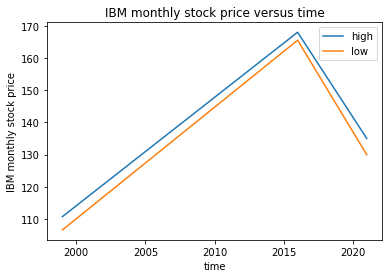

In [10]:
import matplotlib.pyplot as plt

time= [2021, 2016, 1999]

IBM_monthly_stock_price = [134.9900, 167.9800, 110.7500]
IBM_monthly_stock_price2 = [129.9500, 165.5000, 106.6200]

plt.plot(time, IBM_monthly_stock_price, label="high")
plt.plot(time, IBM_monthly_stock_price2, label="low")
plt.title("IBM monthly stock price versus time")
plt.xlabel('time')
plt.ylabel('IBM monthly stock price')
plt.legend()
plt.show()